<a href="https://colab.research.google.com/github/bca12345/Random-vector-projection/blob/master/Haar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
reference: https://arxiv.org/pdf/math-ph/0609050.pdf

This function return the matrix which is distributed with Haar measure 
'''

import math
import numpy as np
import scipy.linalg as la

def haar_measure(n):
    # z = (np.random.randn(n,n) + 1j*np.random.randn(n,n))/math.sqrt(2.0)
    z = np.random.randn(n,n)
    q,r = la.qr(z)
    d = np.diagonal(r)
    ph = d/np.abs(d)
    q = np.multiply(q,ph,q) 
    return q

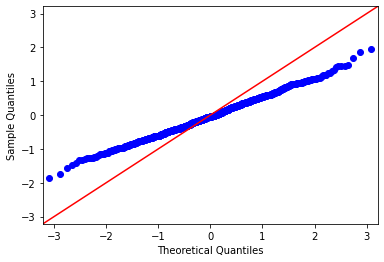

0.3178449270430409
0.31861100416643384


In [3]:
import statsmodels.api as sm
import pylab
'''
Given an input data, wish to generate the Gaussian distribution samples by
projecting the input data onto the span of vector which is chosen from 
Stiefel manifold

'''
Q = haar_measure(1000)
input = np.random.uniform(-1, 1, 1000)
proj = []
for column in Q:
  proj.append(np.dot(input, column))

#resut = sorted(result)
sm.qqplot(np.asarray(proj), line='45')
pylab.show()
print(np.var(proj))
print(np.var(input))

### Figure 1

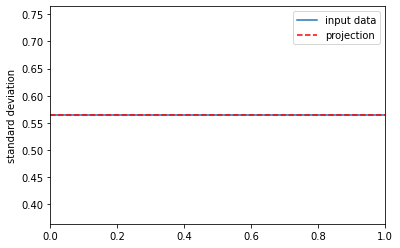

In [4]:
# check the standard deviation of input data X is same as projection X_theta
import matplotlib.pyplot as plt

sigma_input = np.sqrt(np.var(input))
sigma_proj = np.sqrt(np.var(proj))

plt.axhline(y=sigma_input, xmin=0, xmax=1)
plt.axhline(y=sigma_proj, xmin=0, xmax=1, linestyle='--', color='r')
plt.ylim(sigma_input-0.2, sigma_input+0.2)
plt.ylabel('standard deviation')
plt.legend(['input data', 'projection'])
plt.show()

### Figure 2

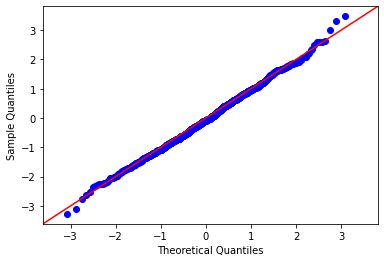

In [5]:
# check the distrbution of X_theta is same as normal distribution 
# after the distribution of X_theta is scaled by sigma_proj
result = [res / sigma_proj for res in proj]
sm.qqplot(np.asarray(result), line='45')
pylab.show()

Here is the correct code to simulate the equation (4) in Appendix1.pdf
\
where w1, w2 stand for choosing different ω, the result will become quite different, and the line shows the difference between the left equation and right equation in equation (4)

professor expected that the difference should become smaller as the dimension become larger, but the simulation show the inconsistent result.

sigma projection =  0.9978389796080049


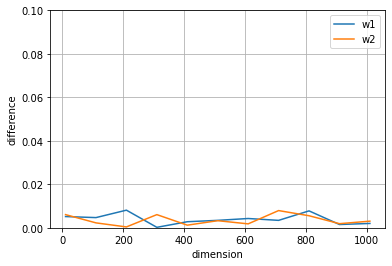

In [12]:
from scipy.stats import norm
from random import randint
from google.colab import files
import pandas as pd

dimension = []
left1 = []
right1 = []
left2 = []
right2 = []
true = []
right_true = []

# for dimension bigger than 100
for d in range(10, 1100, 100):
  dimension.append(d)
  Q = haar_measure(d) # Q: d x d matrix
  #w = Q[:, 2]
  w1 = Q[:, randint(1, d-1)]       # randomly choose w from Q
  w2 = Q[:, (randint(1, d-1)+100)%d]

  # calculate expectation
  projection1 = []
  projection2 = []
  input_square = []
  for j in range(1, 10000):
    input = np.random.laplace(0, 1/np.sqrt(2), d)
    projection1.append(np.dot(input, w1))
    projection2.append(np.dot(input, w2))
    input_square.append(np.dot(input, input))
  sigma_projection1 = np.sqrt(np.var(projection1))
  sigma_projection2 = np.sqrt(np.var(projection2))
  true.append(sigma_projection1)
  left_1 = [proj*norm.ppf(norm.cdf(proj / sigma_projection1)) for proj in projection1]
  right_1 = [proj*proj for proj in projection1]
  left_2 = [proj*norm.ppf(norm.cdf(proj / sigma_projection2)) for proj in projection2]
  right_2 = [proj*proj for proj in projection2]

  left1.append(np.mean(left_1))
  right1.append(np.sqrt(d / np.mean(input_square))*np.mean(right_1))
  left2.append(np.mean(left_2))
  right2.append(np.sqrt(d / np.mean(input_square))*np.mean(right_2))


print('sigma projection = ', sigma_projection1)

#plt.plot(dimension, left, ms=8, linestyle='None', marker='o')
#plt.plot(dimension, right, ms=4, linestyle='None', marker='o')
plt.plot(dimension, [np.abs(l-r) for l,r in zip(left1, right1)])
plt.plot(dimension, [np.abs(l-r) for l,r in zip(left2, right2)])
# plt.plot(dimension, right_true, ms=4, linestyle='None', marker='o')
plt.legend(['w1', 'w2'])
plt.grid()
plt.ylim(0, 0.1)
plt.xlabel('dimension')
plt.ylabel('difference')
plt.savefig("difference.png")
plt.show()

### Figure 3
supposed to be figure3, here I use marker to display, where in Random_Vector_Projection.pdf the figure is a line
\
note this result is **WRONG** because we should fix ω and take average to the different reliazations of $X$ (check the above code block)

sigma input =  0.5814579742989753
sigma projection =  0.5812716178641225


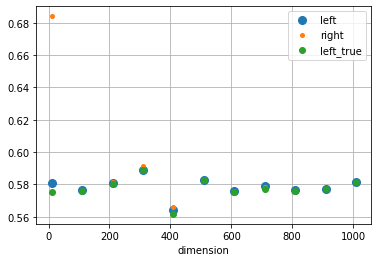

In [9]:
from scipy.stats import norm
from random import randint
dimension = []
left = []
right = []
true = []
right_true = []
projection = []

for d in range(10, 1100, 100):
  dimension.append(d)
  Q = haar_measure(d) # Q: d x d matrix
  #w = Q[:, 2]
  #w = Q[:, randint(1, d-1)]       # randomly choose w from Q

  # calculate expectation
  input = np.random.uniform(-1, 1, d)
  projection = [np.dot(input, w) for w in Q]
  input_square = np.dot(input, input)

  sigma_projection = np.sqrt(np.var(projection))
  sigma = np.sqrt(np.var(input))
  true.append(sigma_projection)
  right_true.append(sigma)
  result_1 = [proj * norm.ppf(norm.cdf(proj / sigma_projection)) for proj in projection]
  result_2 = [proj * proj for proj in projection]
  left.append(np.mean(result_1))
  right.append(np.sqrt(1 / np.var(input))*np.mean(result_2))

print('sigma input = ', sigma)
print('sigma projection = ', sigma_projection)

plt.plot(dimension, left, ms=8, linestyle='None', marker='o')
plt.plot(dimension, right, ms=4, linestyle='None', marker='o')
plt.plot(dimension, true, ms=6, linestyle='None', marker='o')
# plt.plot(dimension, right_true, ms=4, linestyle='None', marker='o')
plt.legend(['left', 'right', 'left_true'])
plt.grid()
#plt.ylim(0.4, 0.8)
plt.xlabel('dimension')
plt.show()